# Build and train neural network
This code loads the IMDB dataset that's included with Keras and creates a dictionary mapping the words in all 50,000 reviews to integers indicating the words' relative frequency of occurrence. Each word is assigned a unique integer. The most common word is assigned the number 1, the second most common word is assigned the number 2, and so on. load_data also returns a pair of tuples containing the movie reviews (in this example, x_train and x_test) and the 1s and 0s classifying those reviews as positive and negative (y_train and y_test).

In [1]:
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


17465344/17464789 [==============================] - 11s 1us/step


So what exactly did the load_data function load? The variable named x_train is a list of 25,000 lists, each of which represents one movie review. (x_test is also a list of 25,000 lists representing 25,000 reviews. x_train will be used for training, while x_test will be used for testing.) But the inner lists — the ones representing movie reviews — don't contain words; they contain integers. Here's how it's described in the Keras documentation:
The reason the inner lists contain numbers rather than text is that you don't train a neural network with text; you train it with numbers. Specifically, you train it with tensors. In this case, each review is a 1-dimensional tensor (think of a 1-dimensional array) containing integers identifying the words contained in the review. To demonstrate, type the following Python statement into an empty cell and execute it to see the integers representing the first review in the training set:

In [2]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

The first number in the list — 1 — doesn't represent a word at all. It marks the start of the review and is the same for every review in the dataset. The numbers 0 and 2 are reserved as well, and you subtract 3 from the other numbers to map an integer in a review to the corresponding integer in the dictionary. The second number — 14 — references the word that corresponds to the number 11 in the dictionary, the third number represents the word assigned the number 19 in the dictionary, and so on.Only a subset of the dictionary entries is shown, but in all, the dictionary contains more than 88,000 words and the integers that correspond to them. The output you see will probably not match the output in the screenshot because the dictionary is generated anew each time load_data is called.

In [3]:
imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

As you have seen, each review in the dataset is encoded as a collection of integers rather than words. Is it possible to reverse-encode a review so you can see the original text that comprised it? Enter the following statements into a new cell and execute them to show the first review in x_train in textual format:In the output, ">" marks the beginning of the review, while "?" marks words that aren't among the most common 10,000 words in the dataset. These "unknown" words are represented by 2s in the list of integers representing a review. Remember the num_words parameter you passed to load_data? This is where it comes into play. It doesn't reduce the size of the dictionary, but it restricts the range of integers used to encode the reviews.

In [4]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

The reviews are "clean" in the sense that letters have been converted to lowercase and punctuation characters removed. But they are not ready to train a neural network to analyze text for sentiment. When you train a neural network with collection of tensors, each tensor needs to be the same length. At present, the lists representing reviews in x_train and x_test have varying lengths.

Fortunately, Keras includes a function that takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s. Enter the following code into the notebook and run it to force all the lists representing movie reviews in x_train and x_test to a length of 500 integers:

In [5]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

now that the training and testing data is prepared, it is time to build the model! Run the following code in the notebook to create a neural network that performs sentiment analysis:

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


The call to the compile function "compiles" the model by specifying important parameters such as which optimizer to use and what metrics to use to judge the accuracy of the model in each training step. Training doesn't begin until you call the model's fit function, so the compile call typically executes quickly.
This model is unusual in that it learns well with just a few epochs. The training accuracy quickly zooms to near 100%, while the validation accuracy goes up for an epoch or two and then flattens out. You generally don't want to train a model for any longer than is required for these accuracies to stabilize. The risk is overfitting, which results in the model performing well against test data but not so well with real-world data. One indication that a model is overfitting is a growing discrepancy between the training accuracy and the validation accuracy. For a great introduction to overfitting, see Overfitting in Machine Learning: What It Is and How to Prevent It.

In [7]:
#Now call the fit function to train the neural network:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 42s 2ms/step - loss: 0.5287 - accuracy: 0.6902 - val_loss: 0.2951 - val_accuracy: 0.8764
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/step - loss: 0.1895 - accuracy: 0.9296 - val_loss: 0.3104 - val_accuracy: 0.8744
Epoch 3/5
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0657 - accuracy: 0.9826 - val_loss: 0.3618 - val_accuracy: 0.8720
Epoch 4/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.0164 - accuracy: 0.9976 - val_loss: 0.4415 - val_accuracy: 0.8659
Epoch 5/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.4811 - val_accuracy: 0.8668


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Another way to check for overfitting is to compare training loss to validation loss as training proceeds. Optimization problems such as this seek to minimize a loss function. You can read more here. For a given epoch, training loss, much greater than validation loss, can be evidence of overfitting. In the previous step, you used the acc and val_acc properties of the history object's history property to plot training and validation accuracy. The same property also contains values named loss and val_loss representing training and validation loss, respectively. If you wanted to plot these values to produce a chart like the one below, how would you modify the code above to do it?

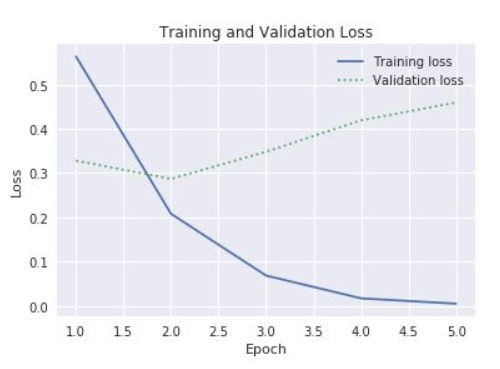

In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.68%


Finish up by calling the model's evaluate method to determine how accurately the model is able to quantify the sentiment expressed in text based on the test data in x_test (reviews) and y_test (0s and 1s, or "labels," indicating which reviews are positive and which are negative):
You probably achieved an accuracy in the 85% to 90% range. That's acceptable considering you built the model from scratch (as opposed to using a pretrained neural network) and the training time was short even without a GPU. It is possible to achieve accuracies of 95% or higher with alternate neural network architectures, particularly recurrent neural networks (RNNs) that utilize Long Short-Term Memory (LSTM) layers. Keras makes it easy to build such networks, but training time can increase exponentially. The model that you built strikes a reasonable balance between accuracy and training time. However, if you would like to learn more about building RNNs with Keras, see Understanding LSTM and its Quick Implementation in Keras for Sentiment Analysis.

# Sentiment Analysis
The real test comes when you input text of your own into the model and see how it performs — that is, how adept it is at quantifying the sentiment expressed in that text. In this unit, you'll write a Python function that accepts a text string as input, passes it to the model, and returns a sentiment score. Then you'll use the function to analyze the sentiment expressed in various text strings.



In [16]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

these statements define a function named analyze that accepts a string as input and returns a number from 0.0 to 1.0 quantifying the sentiment expressed in that string. The higher the number, the more positive the sentiment. The function cleans the input string, converts it into a list of integers referencing words in the dictionary created by the load_data function, and finally calls the model's predict function to score the text for sentiment.

In [17]:
analyze('Easily the most stellar experience I have ever had.')

0.97933894

In [18]:
analyze('The long lines and poor customer service really turned me off.')

0.01919043